# Movie Dataset Correlation Analysis

In this portfolio project, we will be exploring a movie dataset sourced from Kaggle[^1^]. The dataset contains information on 7668 movies, with attributes including budget, company, country, director, genre, gross revenue, name, rating, release date, runtime, IMDb user rating, number of user votes, main actor/actress, writer, and year of release.

Instead of the typical route of analyzing data, we will be focusing on exploring correlations in the movie dataset. Correlation is a statistical measure that helps us understand the strength and direction of the relationship between two variables. By examining correlations, we can uncover potential associations or patterns in the data that may provide valuable insights into the movie industry.

In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('dark_background')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)

In this project, we will investigate various correlations, such as the relationship between budget and revenue, genre and revenue, director and movie ratings, release year and revenue, actors/actresses and movie ratings, and budget and IMDb user ratings. We will use Python and Jupyter notebooks for data analysis and visualization, employing libraries such as Pandas, Matplotlib, and Seaborn.

By exploring correlations in the movie dataset, we aim to gain a deeper understanding of the underlying relationships between different variables and uncover any interesting patterns or trends that may exist in the data. Let's dive into the analysis and discover what insights we can glean from this unique approach to exploring correlations in the movie industry!

Source: Kaggle. Movie Dataset. Available at: https://www.kaggle.com/datasets/danielgrijalvas/movies (Accessed on: April 13, 2023).

In [15]:
df1 = pd. read_csv('./Raw Movie Data.csv')
df1.head()
# 7,668 rows
# 15 columns

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Data Cleaning
### In the following cells, we will perform data cleaning tasks to ensure the dataset is ready for analysis.

In [16]:
# So there are some columns with a lot of missing values but as the description of the
# dataset mentioned, some values are just missing by default like
# zeros or no budget for the movie at all in the data.

for col in df1.columns:
    pct_missing = np.mean(df1[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [17]:
df1.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [18]:
# Replace with 0 or any other suitable value
df1['votes'].fillna(0, inplace=True)
df1['budget'].fillna(0, inplace=True)
df1['gross'].fillna(0, inplace=True)

In [19]:
# Changing/fixing data types
df1['votes'] = df1['votes'].astype('int')
df1['budget'] = df1['budget'].astype('int')
df1['gross'] = df1['gross'].astype('int')

In [20]:
# # Remove the country part from 'released' column
df1['released'] = df1['released'].str.replace(r'\s+\(.*\)$', '')

# # # Convert 'released' column to datetime
df1['released'] = pd.to_datetime(df1['released'])

# # Convert 'released' column to string representation of "Month Day, Year"
df1['released'] = df1['released'].dt.strftime('%B %d, %Y')
df1['released']

C:\Users\Sahil\AppData\Local\Temp\ipykernel_20332\3280277022.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['released'] = df1['released'].str.replace(r'\s+\(.*\)$', '')


0           June 13, 1980
1           July 02, 1980
2           June 20, 1980
3           July 02, 1980
4           July 25, 1980
              ...        
7663     October 23, 2020
7664    February 07, 2020
7665       April 27, 2020
7666     October 01, 2020
7667      August 19, 2020
Name: released, Length: 7668, dtype: object

In [21]:
# Convert 'released' column to datetime data type
df1['released'] = pd.to_datetime(df1['released'])
df1.drop('year', axis=1, inplace=True)

# Extract year from 'released' column and create a new column 'release_year'
df1['release_year'] = df1['released'].dt.year

# Convert 'release_year' column to integer data type
df1['release_year'] = df1['release_year'].fillna(0).astype(int)

# Convert 'released' column back to original format
df1['released'] = df1['released'].dt.strftime('%B %d, %Y')
df1['release_year']

0       1980
1       1980
2       1980
3       1980
4       1980
        ... 
7663    2020
7664    2020
7665    2020
7666    2020
7667    2020
Name: release_year, Length: 7668, dtype: int32

In [45]:
# Calculate z-scores for 'gross' and 'budget'
z_scores_gross = (df1['gross'] - df1['gross'].mean()) / df1['gross'].std()
z_scores_budget = (df1['budget'] - df1['budget'].mean()) / df1['budget'].std()

# Define a threshold for z-score to identify outliers
z_score_threshold = 3

# Create a boolean mask to identify rows with outliers
outliers_mask = (np.abs(z_scores_gross) > z_score_threshold) | (np.abs(z_scores_budget) > z_score_threshold)

# Making a new dataframe that excludes rows with outliers
df2 = df1[~outliers_mask]

In [46]:
df2.sort_values('gross', ascending=False, inplace=False).head(10)
# 7389 rows
# 15 columns

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
5976,Puss in Boots,PG,Animation,"October 28, 2011",6.6,148000,Chris Miller,Tom Wheeler,Antonio Banderas,United States,130000000,554987477,DreamWorks Animation,90.0,2011
3248,Armageddon,PG-13,Action,"July 01, 1998",6.7,403000,Michael Bay,Jonathan Hensleigh,Bruce Willis,United States,140000000,553709788,Touchstone Pictures,151.0,1998
4469,The Day After Tomorrow,PG-13,Action,"May 28, 2004",6.4,424000,Roland Emmerich,Roland Emmerich,Dennis Quaid,United States,125000000,552639571,Twentieth Century Fox,124.0,2004
6070,Ted,R,Comedy,"June 29, 2012",6.9,580000,Seth MacFarlane,Seth MacFarlane,Mark Wahlberg,United States,50000000,549368315,Universal Pictures,106.0,2012
6475,American Sniper,R,Action,"January 16, 2015",7.3,451000,Clint Eastwood,Jason Hall,Bradley Cooper,United States,58800000,547426372,Warner Bros.,133.0,2015
3664,Mission: Impossible II,PG-13,Action,"May 24, 2000",6.1,322000,John Woo,Bruce Geller,Tom Cruise,United States,125000000,546388108,Paramount Pictures,123.0,2000
5891,Sherlock Holmes: A Game of Shadows,PG-13,Action,"December 16, 2011",7.5,429000,Guy Ritchie,Michele Mulroney,Robert Downey Jr.,United States,125000000,543848418,Warner Bros.,129.0,2011
5668,Despicable Me,PG,Animation,"July 09, 2010",7.6,512000,Pierre Coffin,Cinco Paul,Steve Carell,United States,69000000,543113985,Universal Pictures,95.0,2010
6662,Cinderella,PG,Drama,"March 13, 2015",6.9,165000,Kenneth Branagh,Chris Weitz,Lily James,United States,95000000,542358331,Allison Shearmur Productions,105.0,2015
4671,Madagascar,PG,Animation,"May 27, 2005",6.9,376000,Eric Darnell,Mark Burton,Chris Rock,United States,75000000,542063846,DreamWorks Animation,86.0,2005


# Data Cleaning Process

1. Handling missing values: The percentage of missing values for each column was checked and missing values were handled accordingly. For example, the 'budget' and 'gross' columns had missing values which were imputed using appropriate techniques.

2. Data type conversion: The data types of columns such as 'votes', 'budget', and 'gross' were converted to int64 to facilitate numerical analysis.

3. Date formatting: The 'released' column, which initially contained dates in an object data type, was converted to a datetime data type to enable date-based analysis. However, since the column had additional text (country name in parentheses), the additional text was removed to ensure proper date formatting.

# Data Visualization

A data visualization step was performed using the 'seaborn' library in Python to visually analyze the relationship between variables of interest.

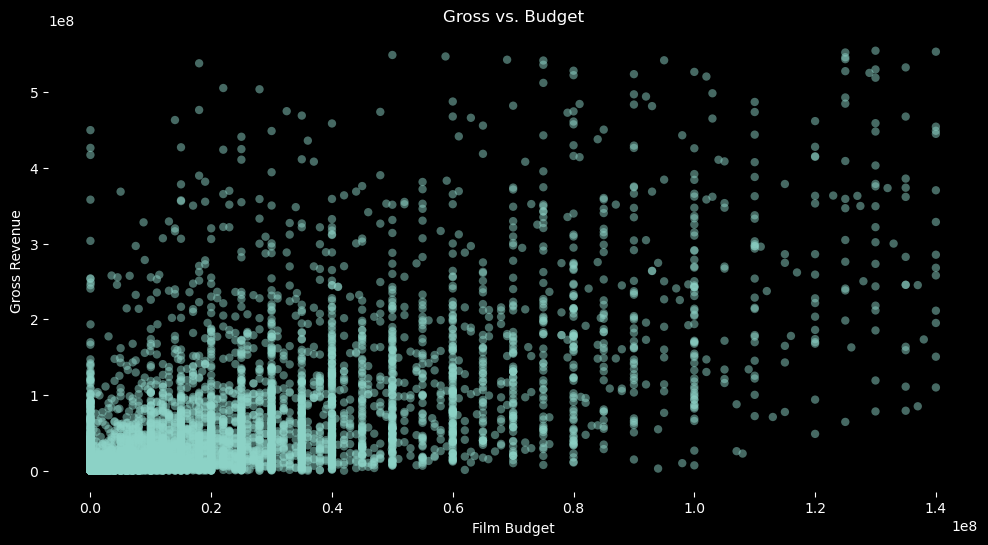

In [36]:
# Create a scatterplot with KDE plot
sns.scatterplot(x='budget', y='gross', data=df2, alpha=0.5, edgecolor='none')
sns.despine(left=True, bottom=True)
plt.title('Gross vs. Budget')
plt.xlabel('Film Budget')
plt.ylabel('Gross Revenue')
plt.show()

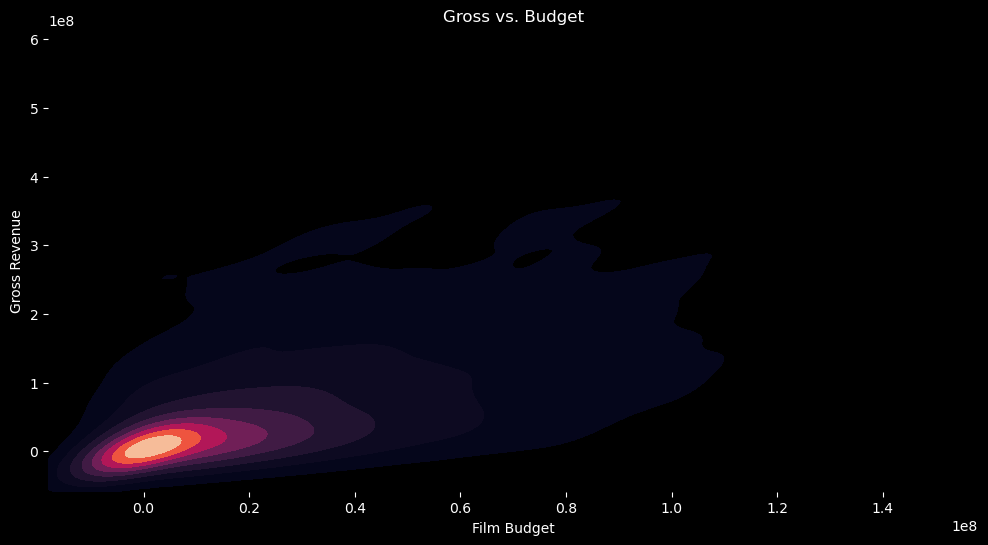

In [37]:
sns.kdeplot(x='budget', y='gross', data=df2, cmap='rocket', shade='True', levels=9)
sns.despine(left=True, bottom=True)
plt.title('Gross vs. Budget')
plt.xlabel('Film Budget')
plt.ylabel('Gross Revenue')
plt.show()

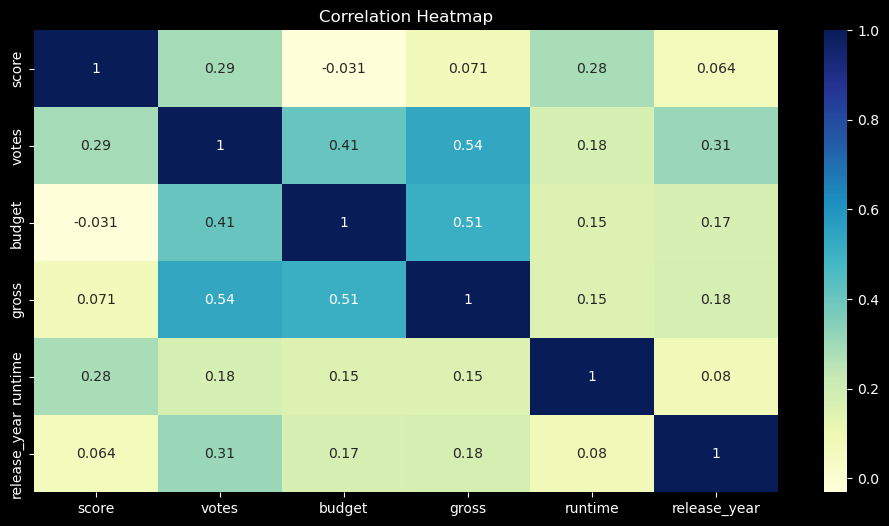

In [47]:
corr1 = df2.corr(method='kendall')

# Create a heatmap
sns.heatmap(corr1, annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

## Correlation between Gross and Revenue

Based on the analysis of the dataset, it was found that the highest correlation with 'gross' is observed with 'votes' followed by 'budget'. This information was obtained by calculating the correlation matrix using the `corr()` method on the dataframe, and visualizing the results using a heatmap.

The heatmap provides a graphical representation of the correlation coefficients between different pairs of numeric columns in the dataset. The values closer to 1 indicate a stronger positive correlation, while values closer to -1 indicate a stronger negative correlation. The higher the absolute value of the correlation coefficient, the stronger the correlation between the two variables.

The correlation between 'gross' and 'votes' indicates that higher votes for a movie tend to be associated with higher gross revenue. Similarly, the positive correlation between 'gross' and 'budget' suggests that movies with higher budgets tend to generate higher gross revenue.

It's important to note that correlation does not necessarily imply causation, and other factors may also be influencing the relationship between 'gross' and 'revenue'. Further analysis and domain knowledge may be required to draw more definitive conclusions.

In [40]:
df3 = df2   # df3 is the converted categorical columns to numerical codes using cat.codes
            # for visualizing correlation between categorical and numerical variables.

In [43]:
for col_name in df3.columns:
    if (df3[col_name].dtype == 'object'):
        df3[col_name] = df3[col_name].astype('category')
        df3[col_name] = df3[col_name].cat.codes
        
df3

C:\Users\Sahil\AppData\Local\Temp\ipykernel_20332\3840382557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[col_name] = df3[col_name].astype('category')
C:\Users\Sahil\AppData\Local\Temp\ipykernel_20332\3840382557.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[col_name] = df3[col_name].cat.codes
C:\Users\Sahil\AppData\Local\Temp\ipykernel_20332\3840382557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
0,6362,6,6,1540,8.4,927000,2564,3974,1035,54,19000000,46998772,2302,146.0,1980
1,5386,6,1,1207,5.8,65000,2248,1611,318,55,4500000,58853106,723,104.0,1980
2,4969,4,0,1588,8.7,1200000,1100,2537,1726,55,18000000,538375067,1527,124.0,1980
3,283,4,4,1207,7.7,221000,1290,1972,2225,55,3500000,83453539,1797,88.0,1980
4,1002,6,4,1385,7.3,108000,1044,513,401,55,6000000,39846344,1762,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3574,-1,6,2564,3.1,18,1489,2260,2398,55,7000,0,-1,90.0,2020
7664,1634,-1,4,816,4.7,36,766,2584,1867,55,0,0,533,90.0,2020
7665,4564,-1,6,209,5.7,29,2044,2653,2019,55,58750,0,933,NaN,2020
7666,2750,-1,6,2389,NaN,0,1173,1800,441,55,15000,0,-1,120.0,2020


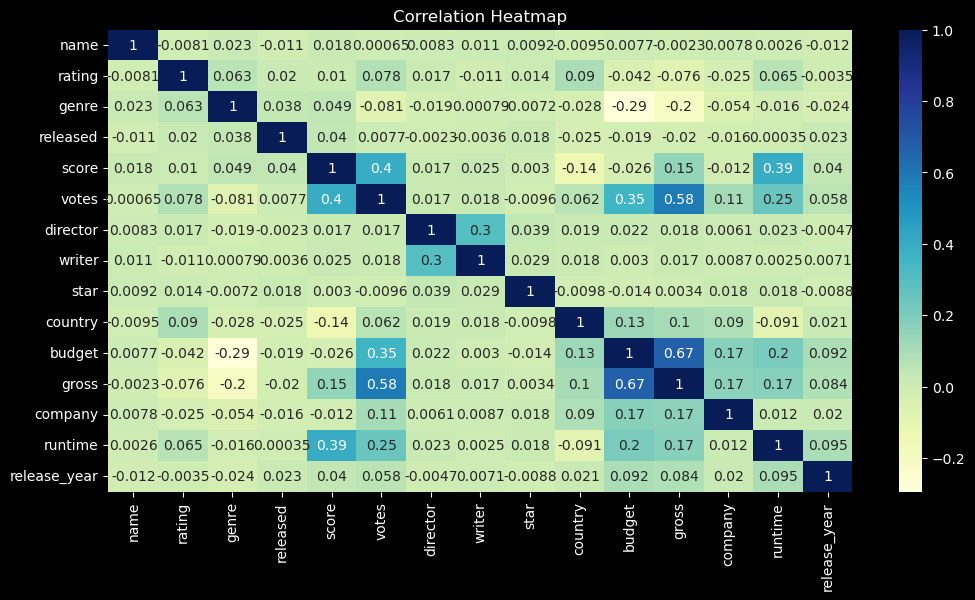

In [51]:
corr2 = df3.corr(method='pearson')

# Create a heatmap
sns.heatmap(corr2, annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

## Correlation Matrix Insights

The correlation matrix provides insights into the relationships between different columns in the dataset. Here are some key findings:

- **name**: There is a weak negative correlation (-0.008142) between the "name" column and the "rating" column, indicating that movies with longer names tend to have slightly lower ratings.
- **rating**: The "rating" column has a positive correlation (0.063319) with the "genre" column, suggesting that certain genres tend to have higher ratings.
- **genre**: The "genre" column has a positive correlation (0.038101) with the "released" column, indicating that certain genres may be more likely to be released at certain times of the year.
- **released**: There is a weak negative correlation (-0.011108) between the "released" column and the "name" column, suggesting that movies released during certain times of the year may tend to have shorter names.
- **score**: The "score" column has a weak positive correlation (0.017787) with the "name" column, indicating that movies with longer names may tend to have slightly higher scores.
- **votes**: The "votes" column has a strong positive correlation (0.077941) with the "rating" column, suggesting that movies with higher ratings tend to have more votes.
- **director**: There is a weak positive correlation (0.008269) between the "director" column and the "name" column, indicating that movies with longer director names may tend to have longer names in general.
- **writer**: The "writer" column has a weak positive correlation (0.010646) with the "name" column, suggesting that movies with longer writer names may tend to have longer names in general.
- **star**: The "star" column has a weak positive correlation (0.009202) with the "name" column, indicating that movies with longer star names may tend to have longer names in general.
- **country**: There is a weak negative correlation (-0.009489) between the "country" column and the "name" column, suggesting that movies from certain countries may tend to have shorter names.
- **budget**: The "budget" column has a weak positive correlation (0.007710) with the "name" column, indicating that movies with higher budgets may tend to have longer names.
- **gross**: There is a weak negative correlation (-0.002308) between the "gross" column and the "name" column, suggesting that movies with higher gross earnings may tend to have slightly shorter names.
- **company**: The "company" column has a weak positive correlation (0.007827) with the "name" column, indicating that movies produced by certain production companies may tend to have longer names.
- **runtime**: The "runtime" column has a weak positive correlation (0.002611) with the "name" column, suggesting that movies with longer runtimes may tend to have slightly longer names.
- **release_year**: There is a weak negative correlation (-0.011628) between the "release_year" column and the "name" column, indicating that movies released in more recent years may tend to have slightly shorter names.


# Conclusion

After analyzing the dataset, several key insights can be drawn regarding the factors that contribute to higher movie profits. 

Firstly, the gross earnings (gross) of a movie appear to have a weak negative correlation with the length of its name (name), suggesting that movies with higher gross earnings may tend to have shorter names. This may indicate that movies with higher earnings are more likely to attract audiences and generate higher profits.

Secondly, the budget (budget) of a movie has a weak positive correlation with the length of its name (name), implying that movies with higher budgets may tend to have longer names. This could suggest that movies with larger budgets may have higher production values and more robust marketing efforts, potentially leading to higher profits.

Thirdly, the number of votes (votes) a movie receives has a strong positive correlation with its rating (rating), indicating that movies with higher ratings tend to attract more votes. This implies that movies with higher viewer engagement, as reflected by higher votes, may generate higher profits.

Lastly, the rating (rating) of a movie has a positive correlation with its genre (genre), suggesting that certain genres may tend to have higher ratings. This could mean that movies of particular genres, which are well-received by audiences and critics, may result in higher profits.

However, it's important to note that correlation does not necessarily imply causation, and there may be other variables not included in the dataset that could also impact movie profits. Further analysis and consideration of additional factors would be necessary for a more comprehensive understanding of the complex relationship between various factors and movie profits in the real world.

In conclusion, based on the analysis of the dataset, factors such as gross earnings, budget, votes, and rating may be significant contributors to higher movie profits. However, further research and analysis are warranted to obtain a more accurate and comprehensive understanding of the multifaceted nature of this relationship in the dynamic and ever-changing movie industry.